<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/main/Metodolog%C3%ADa_de_la_Investigaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fase 1: Exploracion de datos 

*   Calular medias de tendencia central
*   Calcular medidas de dispersión
*   Graficar





In [ ]:
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
dataset.head()

In [ ]:
dataset.groupby("class")['sepal-width'].describe()

In [ ]:
# Dividir en 2 dataset
setosa = dataset[(dataset['class'] == 'Iris-setosa')]
versicolor = dataset[(dataset['class'] == 'Iris-versicolor')]
setosa.plot()
versicolor.plot()
plt.show()


In [ ]:
setosa['sepal-width'].plot(kind="hist", title="Setosa Sepal Width")
plt.xlabel("Length (units)")
plt.savefig('Setosa_sepal_width')


In [ ]:
versicolor['sepal-width'].plot(kind="hist", title= "Versicolor Sepal Width", color="green")
plt.xlabel("Length (units)")
plt.savefig('Versicolor_sepal_width')

In [ ]:
boxplot = versicolor.boxplot(column=['sepal-length',	'sepal-width',	'petal-length',	'petal-width'])

# Prueba de hipótesis

Prueba de hipótesis en python

|       |  | Pruebas Paramétricas     | Pruebas No Paramétricas  |
| ----------- | ----------- | ----------- | ----------- |
| Muestras Independientes     | Múltiples muestras | Anova     |  Kruskal-Wallis|
|       | Dos Muestras| t de Student      | U Mann Whitney |
| Muestras Dependientes      | Múltiples muestras | ANOVA de dos vías      | Friedman |
|      | Dos Muestras | Prueba t dependiente      | Wilcoxson |



https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/



*   Pruevas parametricas: Distibucion normal
*   Muestras dependinetes : Esta prueba se utiliza cuando las muestras son dependientes; esto es, cuando se trata de una única muestra que ha sido evaluada dos veces (muestras repetidas) o cuando las dos muestras han sido emparejadas o apareadas.






*   H0 La muestra sigue una distribución normal
*  H1  La muestra no sigue una distribución normal



In [ ]:
from scipy import stats

Test de normalidad visual

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


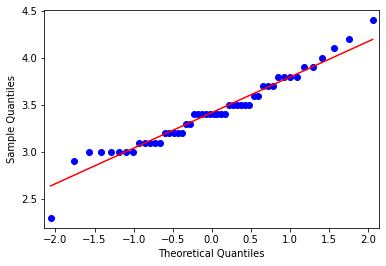

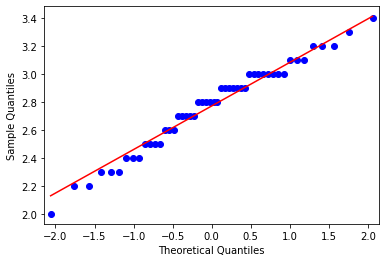

In [78]:
from statsmodels.graphics.gofplots import qqplot
qqplot(setosa['sepal-width'], line='s')
from statsmodels.graphics.gofplots import qqplot
qqplot(versicolor['sepal-width'], line='s')
plt.show()

In [ ]:
stat, p = stats.shapiro(setosa['sepal-width'])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')

In [ ]:
stat, p = stats.shapiro(versicolor['sepal-width'])
# interpret
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra sigue una distribución normal')

Pruebas paramétricas dos muestras independientes (ANOVA)

In [ ]:
H0: La media de las muestras son iguales
H1: La media de las muestras no son iguales

In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
stat, p = stats.ttest_ind(setosa['sepal-width'], versicolor['sepal-width'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('La media de las muestras son iguales')
else:
	print('La media de las muestras no son iguales')